https://mental.jmir.org/2024/1/e57234

Verbosity in Mental Health Subreddits
The total number of posts and the verbosity (the average number of words per post in a subreddit) are shown in Figure 2. R/Depression is the most active of the mental health subreddits, and only behind the r/DnD (referring to Dungeons and Dragons) and r/gaming subreddits overall. The subreddits were sorted by verbosity (green line), which shows higher values for mental health posts as opposed to non–mental health posts. Moreover, within mental health subreddits, there are differences of more than 30% between the least verbose subreddits (r/schizophrenia and r/EDAnonymous [eating disorders anonymous]) and the high-verbosity subreddits (r/PTSD [posttraumatic stress disorder] and r/Depression).

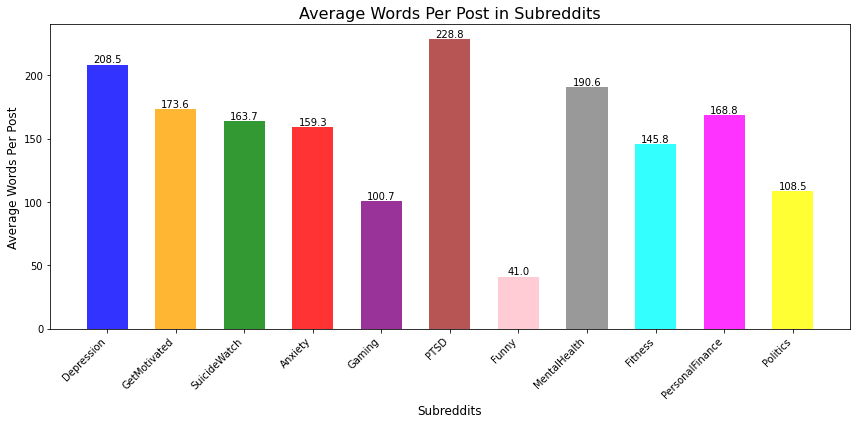

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (excluding AskReddit)
datasets = {
    'Depression': pd.read_csv('depression_posts.csv'),
    'GetMotivated': pd.read_csv('GetMotivated_posts.csv'),
    'SuicideWatch': pd.read_csv('SuicideWatch_posts.csv'),
    'Anxiety': pd.read_csv('Anxiety_posts.csv'),
    'Gaming': pd.read_csv('gaming_posts.csv'),
    'PTSD': pd.read_csv('ptsd_posts.csv'),
    'Funny': pd.read_csv('funny_posts.csv'),
    'MentalHealth': pd.read_csv('mentalhealth_posts.csv'),
    'Fitness': pd.read_csv('Fitness_posts.csv'),
    'PersonalFinance': pd.read_csv('PersonalFinance_posts.csv'),
    'Politics': pd.read_csv('politics_posts.csv')
}

# Calculate average word count for each subreddit
results = []
for subreddit, df in datasets.items():
    # Ensure 'Content' column exists and drop NaN values
    if 'Content' in df.columns:
        word_counts = df['Content'].dropna().apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
        avg_word_count = word_counts.mean() if not word_counts.empty else 0
        results.append({
            'Subreddit': subreddit,
            'Avg_Words_Per_Post': avg_word_count
        })
    else:
        # Handle missing 'Content' column
        results.append({
            'Subreddit': subreddit,
            'Avg_Words_Per_Post': 0  # Default to 0 if no 'Content' column
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Define colors for each subreddit
colors = [
    'blue', 'orange', 'green', 'red', 'purple',
    'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow'
]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for average words per post
bars = ax.bar(results_df['Subreddit'], results_df['Avg_Words_Per_Post'], color=colors, width=0.6, alpha=0.8)

# Add labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Add axis labels and title
ax.set_xlabel('Subreddits', fontsize=12)
ax.set_ylabel('Average Words Per Post', fontsize=12)
ax.set_title('Average Words Per Post in Subreddits', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


/var/folders/68/zwqn0ws14_l2cr8xg5jd23gw0000gn/T/ipykernel_73990/809179565.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=support_df, x="Frequency", y="Support_Type", palette="coolwarm")


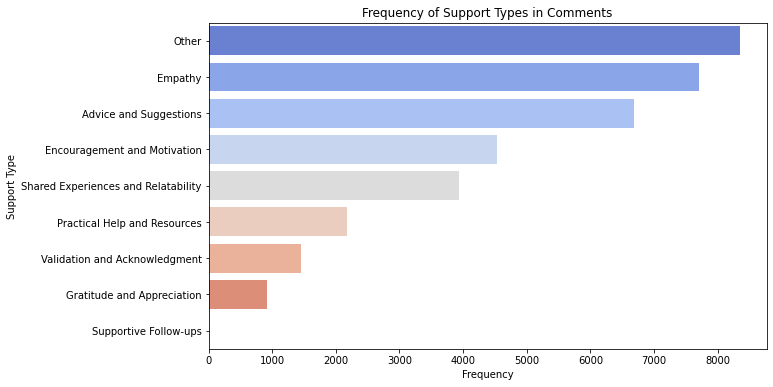

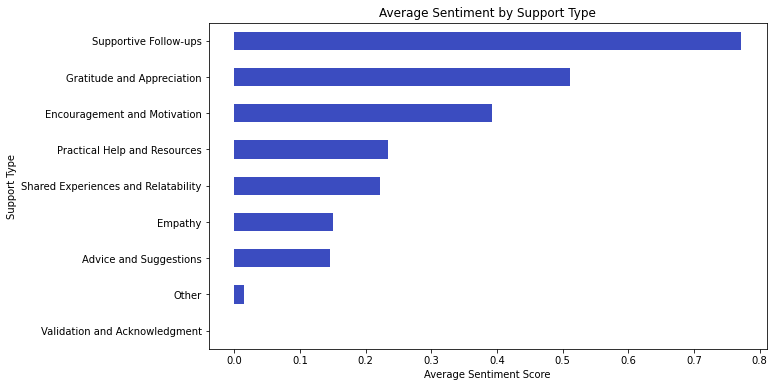

In [21]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Import all datasets ending with '_comments.csv'
# Update the file paths as necessary
file_names = [
    "SuicideWatch_comments.csv",
    "depression_comments.csv",
]

# Combine all datasets
df_comments = pd.concat([pd.read_csv(file) for file in file_names], ignore_index=True)

# Step 2: Clean and preprocess the comments
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r"[^A-Za-z0-9\s]", "", str(text))
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

df_comments["Cleaned_Comment"] = df_comments["Comment Body"].apply(clean_text)

# Step 3: Thematic Coding
# Define keywords or phrases for different types of support
support_types = {
    "Empathy": [
        "sorry", "understand", "feel", "support", "empathy", "compassion", "sympathy",
        "hear you", "there for you", "it's okay", "you're not alone", "been there",
        "acknowledge", "care", "listening", "understanding", "sad to hear", "worry about",
        "take your time", "it's hard", "makes sense to feel", "thank you for sharing"
    ],
    "Advice and Suggestions": [
        "should", "try", "suggest", "advice", "recommend", "need to", "consider",
        "best to", "could", "would", "might", "better if", "approach", "think about",
        "helpful", "strategy", "look into", "reach out to", "it might help", 
        "have you thought about", "step by step", "work on", "ways to improve"
    ],
    "Shared Experiences and Relatability": [
        "i've", "me too", "same", "also", "i felt", "i know", "been there", "similar",
        "relate", "relating", "experience", "when i", "in my case", "once", "too",
        "what happened to me", "happened to", "like me", "felt the same", "i understand because",
        "this reminds me of", "i can relate", "i went through"
    ],
    "Encouragement and Motivation": [
        "you can", "believe", "hope", "strong", "better", "keep going", "don't give up",
        "stay strong", "brave", "you will", "it gets better", "hang in there", 
        "you've got this", "you'll make it", "stay hopeful", "cheer up", "you deserve",
        "you are", "trust yourself", "focus on", "one step at a time", "proud of you",
        "you're amazing", "you are loved", "small steps lead to big changes", "you matter"
    ],
    "Gratitude and Appreciation": [
        "thank you", "thanks", "appreciate", "grateful", "thankful", "blessed", 
        "gratitude", "means a lot", "so kind", "so helpful", "big help", "owe you",
        "thank you for being here", "i'm grateful", "thank you for your kind words",
        "you made a difference", "appreciate your response"
    ],
    "Validation and Acknowledgment": [
        "you're right", "that's valid", "makes sense", "fair point", "good thought",
        "true", "agree", "exactly", "right to feel", "not wrong", "reasonable", 
        "appropriate", "valid", "completely agree", "totally", "it's okay to feel this way",
        "your feelings are valid", "you're not overreacting", "i hear you"
    ],
    "Practical Help and Resources": [
        "resource", "helpline", "call this", "visit", "contact", "hotline", 
        "website", "reach out", "find help", "get in touch", "number to call", 
        "service", "professional", "organization", "go here", "step by step",
        "resourceful", "therapist", "counselor", "psychiatrist", "crisis line",
        "talk to", "mental health", "support groups", "therapy"
    ],
    "Supportive Follow-ups": [
        "how are you now", "checking in", "update us", "follow up", "thinking of you",
        "let us know", "did it help", "still here for you", "any updates", 
        "keep us posted", "hope you're okay", "still supporting you", "here to listen"
    ]
}

# Function to assign support type
def categorize_support(comment, support_types):
    categories = []
    for category, keywords in support_types.items():
        if any(keyword in comment for keyword in keywords):
            categories.append(category)
    return categories if categories else ["Other"]

df_comments["Support_Types"] = df_comments["Cleaned_Comment"].apply(
    lambda x: categorize_support(x, support_types)
)

# Step 4: Frequency Analysis
# Count the frequency of each support type
from collections import Counter

# Flatten the list of support types
support_counts = Counter(
    [item for sublist in df_comments["Support_Types"] for item in sublist]
)

# Convert to DataFrame for visualization
support_df = pd.DataFrame(support_counts.items(), columns=["Support_Type", "Frequency"])
support_df = support_df.sort_values(by="Frequency", ascending=False)

# Step 5: Effectiveness Assessment
# Use VADER sentiment analysis to measure the impact of comments
analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return compound sentiment score

df_comments["Sentiment"] = df_comments["Cleaned_Comment"].apply(sentiment_score)

# Calculate average sentiment for each support type
effectiveness_df = df_comments.explode("Support_Types").groupby("Support_Types")[
    "Sentiment"
].mean()

# Step 6: Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency of support types
plt.figure(figsize=(10, 6))
sns.barplot(data=support_df, x="Frequency", y="Support_Type", palette="coolwarm")
plt.title("Frequency of Support Types in Comments")
plt.xlabel("Frequency")
plt.ylabel("Support Type")
plt.show()

# Effectiveness of support types
plt.figure(figsize=(10, 6))
effectiveness_df.sort_values().plot(kind="barh", colormap="coolwarm", figsize=(10, 6))
plt.title("Average Sentiment by Support Type")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Support Type")
plt.show()

# Save results
df_comments.to_csv("combined_comments_with_support_analysis.csv", index=False)
support_df.to_csv("support_type_frequency.csv", index=False)
effectiveness_df.to_csv("support_effectiveness.csv", header=["Average Sentiment"])


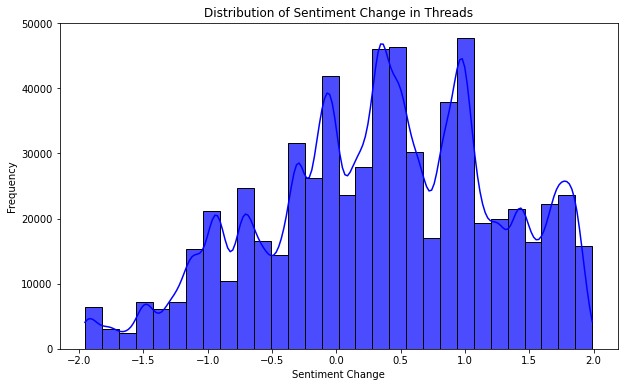

/var/folders/68/zwqn0ws14_l2cr8xg5jd23gw0000gn/T/ipykernel_73990/486352823.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_change_counts.index, y=sentiment_change_counts.values, palette="coolwarm")


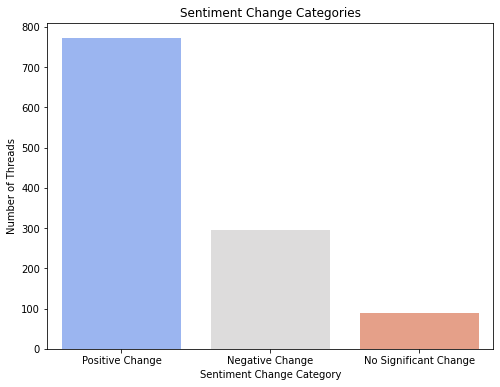

In [27]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Import datasets
post_files = [
    "SuicideWatch_posts.csv",
    "depression_posts.csv",
]
comment_files = [
    "SuicideWatch_comments.csv",
    "depression_comments.csv",
]

# Combine post and comment datasets
df_posts = pd.concat([pd.read_csv(file) for file in post_files], ignore_index=True)
df_comments = pd.concat([pd.read_csv(file) for file in comment_files], ignore_index=True)

# Step 2: Clean and preprocess the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r"[^A-Za-z0-9\s]", "", str(text))
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

df_posts["Cleaned_Post_Content"] = df_posts["Content"].apply(clean_text)
df_comments["Cleaned_Comment"] = df_comments["Comment Body"].apply(clean_text)

# Step 3: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Return compound sentiment score

df_posts["Post_Sentiment"] = df_posts["Cleaned_Post_Content"].apply(sentiment_score)
df_comments["Comment_Sentiment"] = df_comments["Cleaned_Comment"].apply(sentiment_score)

# Step 4: Merge posts and comments based on Post ID
df_combined = pd.merge(
    df_posts[["Post ID", "Post Title", "Cleaned_Post_Content", "Post_Sentiment"]],
    df_comments[["Post ID", "Comment Body", "Cleaned_Comment", "Comment_Sentiment"]],
    on="Post ID",
    how="inner"
)

# Step 5: Calculate Sentiment Change
df_combined["Sentiment_Change"] = df_combined["Comment_Sentiment"] - df_combined["Post_Sentiment"]

# Step 6: Categorize Threads Based on Sentiment Change
def categorize_sentiment_change(change):
    if change > 0.1:
        return "Positive Change"
    elif change < -0.1:
        return "Negative Change"
    else:
        return "No Significant Change"

df_combined["Sentiment_Change_Category"] = df_combined["Sentiment_Change"].apply(categorize_sentiment_change)

# Step 7: Aggregate Sentiment Change by Thread
thread_sentiment_summary = df_combined.groupby("Post ID").agg({
    "Post_Sentiment": "first",
    "Comment_Sentiment": "mean",
    "Sentiment_Change": "mean",
    "Sentiment_Change_Category": lambda x: x.value_counts().idxmax()
}).reset_index()

# Step 8: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sentiment Change
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["Sentiment_Change"], kde=True, bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Sentiment Change in Threads")
plt.xlabel("Sentiment Change")
plt.ylabel("Frequency")
plt.show()

# Sentiment Change Categories
sentiment_change_counts = thread_sentiment_summary["Sentiment_Change_Category"].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_change_counts.index, y=sentiment_change_counts.values, palette="coolwarm")
plt.title("Sentiment Change Categories")
plt.xlabel("Sentiment Change Category")
plt.ylabel("Number of Threads")
plt.show()


# Step 9: Save Results
df_combined.to_csv("threads_with_sentiment_change.csv", index=False)
thread_sentiment_summary.to_csv("thread_sentiment_summary.csv", index=False)


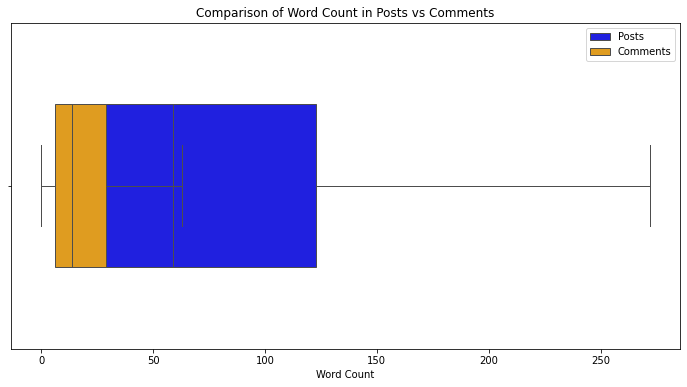

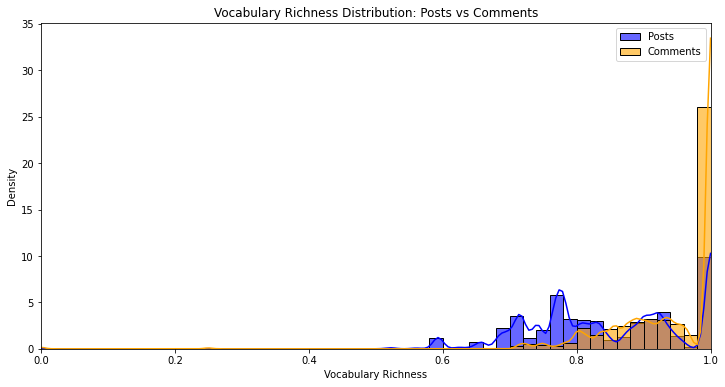

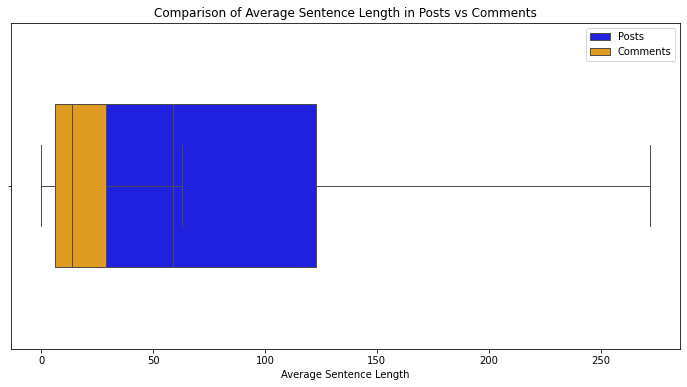

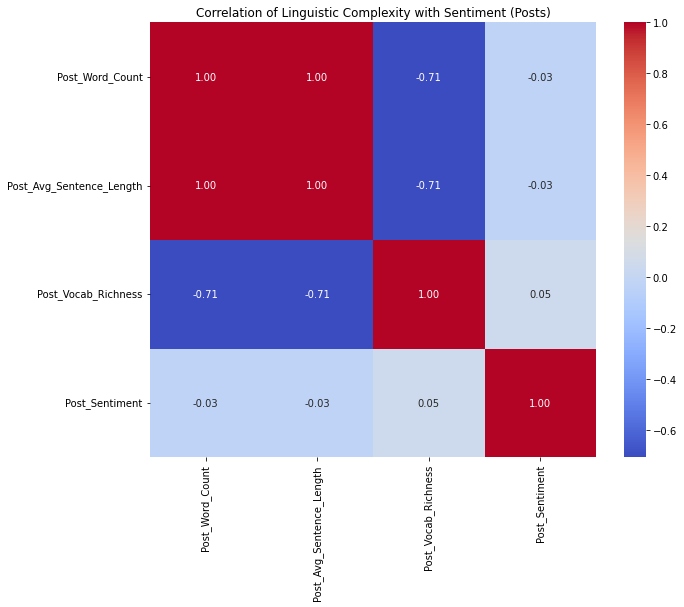

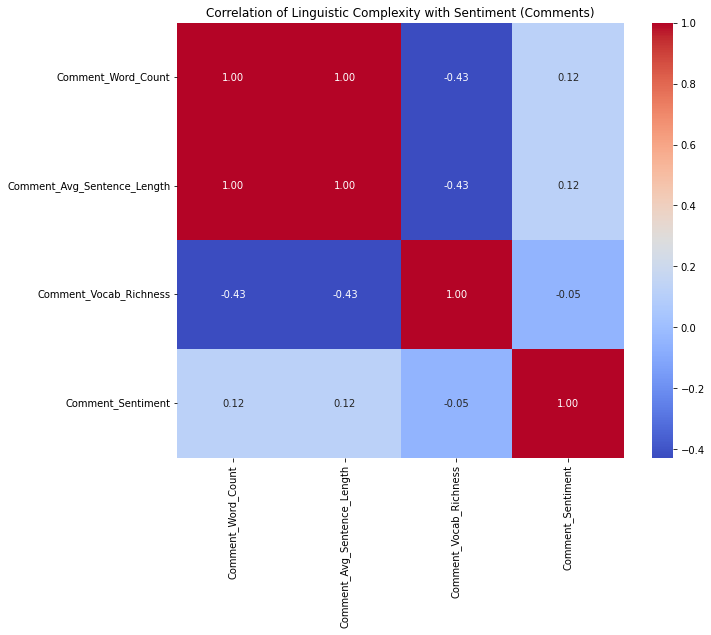

In [31]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import datasets
post_files = [
    "SuicideWatch_posts.csv",
    "depression_posts.csv",
]
comment_files = [
    "SuicideWatch_comments.csv",
    "depression_comments.csv",
]

# Combine post and comment datasets
df_posts = pd.concat([pd.read_csv(file) for file in post_files], ignore_index=True)
df_comments = pd.concat([pd.read_csv(file) for file in comment_files], ignore_index=True)

# Step 2: Clean and preprocess the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r"[^A-Za-z0-9\s]", "", str(text))
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

df_posts["Cleaned_Post_Content"] = df_posts["Content"].apply(clean_text)
df_comments["Cleaned_Comment"] = df_comments["Comment Body"].apply(clean_text)

# Step 3: Calculate Linguistic Complexity
def calculate_complexity(text):
    words = text.split()
    num_words = len(words)
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    num_unique_words = len(set(words))
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else num_words
    vocab_richness = num_unique_words / num_words if num_words > 0 else 0
    return num_words, avg_sentence_length, vocab_richness

# Posts Complexity
df_posts["Post_Word_Count"], df_posts["Post_Avg_Sentence_Length"], df_posts["Post_Vocab_Richness"] = zip(
    *df_posts["Cleaned_Post_Content"].apply(calculate_complexity))

# Comments Complexity
df_comments["Comment_Word_Count"], df_comments["Comment_Avg_Sentence_Length"], df_comments["Comment_Vocab_Richness"] = zip(
    *df_comments["Cleaned_Comment"].apply(calculate_complexity))

# Step 4: Merge Posts and Comments for Thread-Level Analysis
df_combined = pd.merge(
    df_posts[["Post ID", "Cleaned_Post_Content", "Post_Word_Count", "Post_Avg_Sentence_Length", "Post_Vocab_Richness"]],
    df_comments[["Post ID", "Cleaned_Comment", "Comment_Word_Count", "Comment_Avg_Sentence_Length", "Comment_Vocab_Richness"]],
    on="Post ID",
    how="inner"
)

# Step 5: Visualization - Comparison of Linguistic Complexity
# Word Count Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x="Post_Word_Count", color="blue", showfliers=False, width=0.5)
sns.boxplot(data=df_combined, x="Comment_Word_Count", color="orange", showfliers=False, width=0.5)
plt.title("Comparison of Word Count in Posts vs Comments")
plt.xlabel("Word Count")
plt.legend(["Posts", "Comments"])
plt.show()

# Vocabulary Richness Comparison
# Vocabulary Richness Comparison with Adjustments
plt.figure(figsize=(12, 6))

# Adjust bins and normalize for better clarity
sns.histplot(df_combined["Post_Vocab_Richness"], kde=True, bins=50, color="blue", label="Posts", alpha=0.6, stat="density")
sns.histplot(df_combined["Comment_Vocab_Richness"], kde=True, bins=50, color="orange", label="Comments", alpha=0.6, stat="density")

plt.title("Vocabulary Richness Distribution: Posts vs Comments")
plt.xlabel("Vocabulary Richness")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 1)  # Limiting to 0-1 since vocabulary richness is a ratio
plt.show()


# Average Sentence Length Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x="Post_Avg_Sentence_Length", color="blue", showfliers=False, width=0.5)
sns.boxplot(data=df_combined, x="Comment_Avg_Sentence_Length", color="orange", showfliers=False, width=0.5)
plt.title("Comparison of Average Sentence Length in Posts vs Comments")
plt.xlabel("Average Sentence Length")
plt.legend(["Posts", "Comments"])
plt.show()

# Step 6: Correlation with Sentiment
# Calculate sentiment for posts and comments
analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

df_posts["Post_Sentiment"] = df_posts["Cleaned_Post_Content"].apply(sentiment_score)
df_comments["Comment_Sentiment"] = df_comments["Cleaned_Comment"].apply(sentiment_score)

# Correlation Analysis
post_corr = df_posts[["Post_Word_Count", "Post_Avg_Sentence_Length", "Post_Vocab_Richness", "Post_Sentiment"]].corr()
comment_corr = df_comments[["Comment_Word_Count", "Comment_Avg_Sentence_Length", "Comment_Vocab_Richness", "Comment_Sentiment"]].corr()

# Visualization: Correlation Heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(post_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Linguistic Complexity with Sentiment (Posts)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(comment_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Linguistic Complexity with Sentiment (Comments)")
plt.show()

# Save Results
df_combined.to_csv("linguistic_complexity_analysis.csv", index=False)


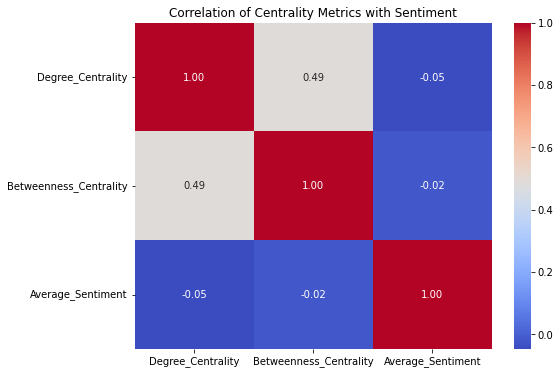

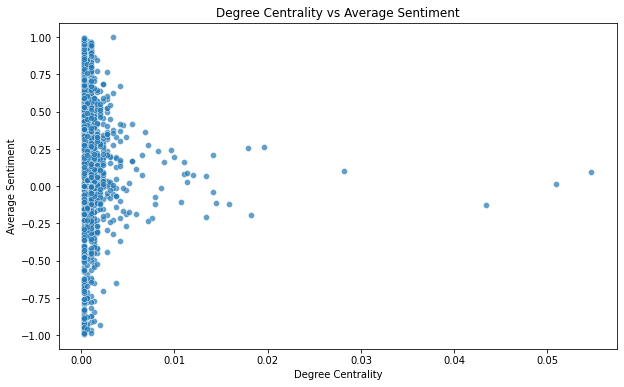

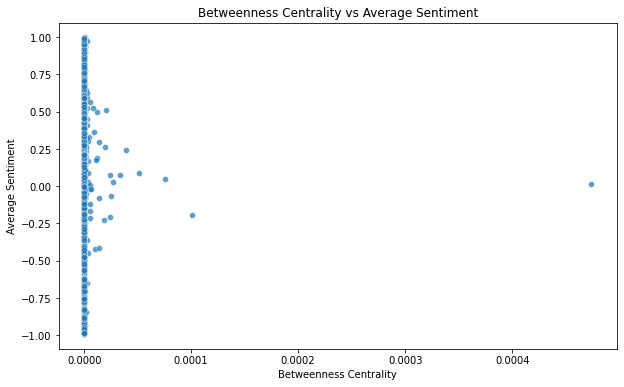

In [32]:
import pandas as pd
import networkx as nx
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
post_files = [
    "SuicideWatch_posts.csv",
    "depression_posts.csv",
]
comment_files = [
    "SuicideWatch_comments.csv",
    "depression_comments.csv",
]

df_posts = pd.concat([pd.read_csv(file) for file in post_files], ignore_index=True)
df_comments = pd.concat([pd.read_csv(file) for file in comment_files], ignore_index=True)

# Step 2: Clean the text and preprocess
analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
    sentiment = analyzer.polarity_scores(str(text))
    return sentiment['compound']

df_posts["Post_Sentiment"] = df_posts["Content"].apply(sentiment_score)
df_comments["Comment_Sentiment"] = df_comments["Comment Body"].apply(sentiment_score)

# Step 3: Merge posts and comments
df_combined = pd.merge(
    df_posts[["Post ID", "User", "Post_Sentiment"]],
    df_comments[["Post ID", "Comment Author", "Comment_Sentiment"]],
    on="Post ID",
    how="inner"
)

# Step 4: Create Interaction Network
interaction_network = nx.DiGraph()

# Add edges between post authors and comment authors
for _, row in df_combined.iterrows():
    interaction_network.add_edge(row["User"], row["Comment Author"], sentiment=row["Comment_Sentiment"])

# Step 5: Calculate Network Metrics
degree_centrality = nx.degree_centrality(interaction_network)
betweenness_centrality = nx.betweenness_centrality(interaction_network)
centrality_df = pd.DataFrame({
    "User": list(degree_centrality.keys()),
    "Degree_Centrality": list(degree_centrality.values()),
    "Betweenness_Centrality": list(betweenness_centrality.values())
})

# Step 6: Merge Centrality Metrics with Sentiment
user_sentiment = df_combined.groupby("User")["Comment_Sentiment"].mean().reset_index()
user_sentiment = user_sentiment.rename(columns={"Comment_Sentiment": "Average_Sentiment"})

centrality_df = centrality_df.merge(user_sentiment, on="User", how="left")

# Step 7: Correlation Analysis
correlation = centrality_df[["Degree_Centrality", "Betweenness_Centrality", "Average_Sentiment"]].corr()

# Step 8: Visualize Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Centrality Metrics with Sentiment")
plt.show()

# Step 9: Visualize Centrality vs Sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=centrality_df, x="Degree_Centrality", y="Average_Sentiment", alpha=0.7)
plt.title("Degree Centrality vs Average Sentiment")
plt.xlabel("Degree Centrality")
plt.ylabel("Average Sentiment")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=centrality_df, x="Betweenness_Centrality", y="Average_Sentiment", alpha=0.7)
plt.title("Betweenness Centrality vs Average Sentiment")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Average Sentiment")
plt.show()

# Save Results
centrality_df.to_csv("centrality_sentiment_analysis.csv", index=False)
